## Three projections of CT data

example from https://github.com/arboiscodemedia/Dicom, 

Data from collection https://figshare.com/collections/FUMPE/4107803:

https://figshare.com/articles/dataset/Patient26/6265604?backTo=%2Fcollections%2FFUMPE%2F4107803&file=11449943

(Female Patient with 213 slice of pulmonary embolism CT-Angiography.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pydicom as dicom

path="./PAT026" 
ct_images=os.listdir(path)

slices = [dicom.read_file(path+'/'+s,force=True) for s in ct_images]
#print(slices)
slices = sorted(slices,key=lambda x:x.ImagePositionPatient[2])

pixel_spacing = slices[0].PixelSpacing
slices_thickess = slices[0].SliceThickness

In [2]:
axial_aspect_ratio = pixel_spacing[1]/pixel_spacing[0]
sagital_aspect_ratio = pixel_spacing[1]/slices_thickess
coronal_aspect_ratio = slices_thickess/pixel_spacing[0]

print("Pixel spacing is:", pixel_spacing)
print("Slices Thickness is:", slices_thickess)

print("Axial Aspect Ratio:", axial_aspect_ratio)
print("Sagital Aspect Ratio:", sagital_aspect_ratio)
print("Coronal Aspect Ratio:", coronal_aspect_ratio)

Pixel spacing is: [0.634766, 0.634766]
Slices Thickness is: 1
Axial Aspect Ratio: 1.0
Sagital Aspect Ratio: 0.634766
Coronal Aspect Ratio: 1.5753836846964078


In [3]:
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
volume3d = np.zeros(img_shape)
print(img_shape)

[512, 512, 213]


In [4]:
for i,s in enumerate(slices):
    array2D=s.pixel_array
    volume3d[:,:,i]= array2D

print(volume3d)

[[[ 17.  22.  14. ...  20.  34.  52.]
  [ 13.  27.  15. ...  23.  25.  40.]
  [ 21.  29.  27. ...  27.  18.  14.]
  ...
  [ 37.  33.  17. ...  17.  33.  20.]
  [ 33.  28.  33. ...  18.  11.   6.]
  [ 26.  21.  31. ...  17.   0.   9.]]

 [[ 26.  13.  16. ...  25.  29.  38.]
  [ 13.  26.  10. ...  17.  21.  44.]
  [ 13.  29.  19. ...  24.  19.  29.]
  ...
  [ 36.  31.  30. ...  13.  15.  20.]
  [ 19.  24.  39. ...  21.   0.   7.]
  [ 19.  23.  29. ...  24.   0.  22.]]

 [[ 31.  15.  24. ...  39.  36.  40.]
  [ 17.  16.   9. ...  22.  18.  34.]
  [ 12.  26.   8. ...  23.  13.  30.]
  ...
  [ 28.  32.  39. ...  17.   4.  11.]
  [ 11.  22.  40. ...  25.   2.  13.]
  [ 22.  33.  31. ...  28.  18.  32.]]

 ...

 [[ 80.  73.  51. ... 100. 112. 116.]
  [ 88.  76.  44. ... 103. 102. 105.]
  [ 82.  81.  79. ...  96. 100. 108.]
  ...
  [ 87.  87.  86. ... 167. 233. 214.]
  [ 80.  95.  99. ... 170. 240. 225.]
  [ 89.  97.  99. ... 185. 224. 236.]]

 [[ 78.  89.  54. ... 144. 142. 127.]
  [ 81.  90.

Proportional sizes:

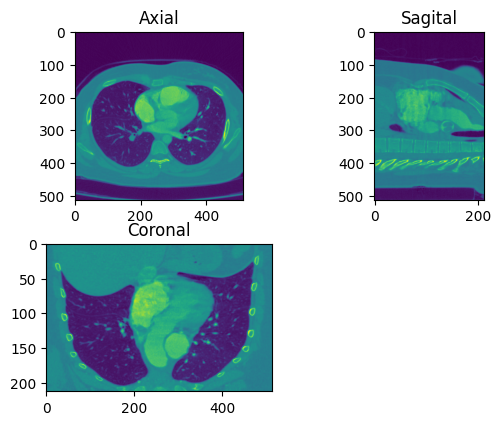

In [5]:
axial=plt.subplot(2,2,1)
plt.title("Axial")
plt.imshow(volume3d[:,:,img_shape[2]//2])
axial.set_aspect(axial_aspect_ratio)

sagital=plt.subplot(2,2,2)
plt.title("Sagital")
plt.imshow(volume3d[:,img_shape[1]//2,:])
sagital.set_aspect(sagital_aspect_ratio)

coronal = plt.subplot(2,2,3)
plt.title("Coronal")
plt.imshow(volume3d[img_shape[0]//2,:,:].T)
coronal.set_aspect(coronal_aspect_ratio)


plt.show()

Dimensions in mm:

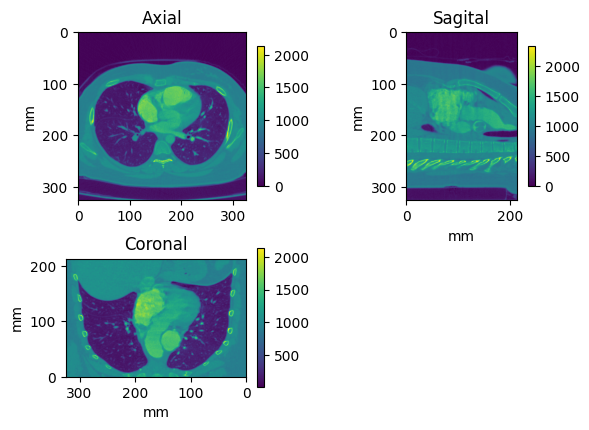

In [6]:
axial=plt.subplot(2,2,1)
plt.title("Axial")
#plt.imshow(volume3d[:,:,img_shape[2]//2])
plt.imshow(volume3d[:,:,img_shape[2]//2], extent=(0, array2D.shape[0]*pixel_spacing[0], array2D.shape[1]*pixel_spacing[0], 0))
#axial.set_aspect(axial_aspect_ratio)
plt.colorbar(shrink=0.83) # shrink is used to adjust the colorbar size
plt.ylabel('mm')
#plt.xlabel('mm')

sagital=plt.subplot(2,2,2)
plt.title("Sagital")
plt.imshow(volume3d[:,img_shape[1]//2,:], extent=(0, volume3d.shape[2]*slices_thickess, array2D.shape[1]*pixel_spacing[0], 0))
#sagital.set_aspect(sagital_aspect_ratio)
plt.colorbar(shrink=0.83) # shrink is used to adjust the colorbar size
plt.xlabel('mm')
plt.ylabel('mm')


coronal = plt.subplot(2,2,3)
plt.title("Coronal")
plt.imshow(volume3d[img_shape[0]//2,:,:].T, extent=(array2D.shape[1]*pixel_spacing[0], 0, 0, volume3d.shape[2]*slices_thickess))
#coronal.set_aspect(coronal_aspect_ratio)
plt.colorbar(shrink=0.83) # shrink is used to adjust the colorbar size
plt.xlabel('mm')
plt.ylabel('mm')

plt.show()

Shape of 3D array and a slice:

In [7]:
print(array2D.shape)
print(volume3d.shape)    

(512, 512)
(512, 512, 213)
